# **Problem Statement:**


Linear regression by using Deep Neural network: Implement Boston housing price
predictionproblem by Linear regression using Deep Neural network. Use Boston House price
prediction dataset. 

About the dataset:

Description:
A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc. The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity.

Objective:

Understand the Dataset & cleanup (if required).

Build Regression models to predict the sales w.r.t a single & multiple feature.

Also evaluate the models & compare thier respective scores like R2, RMSE, etc.

Import Libraries

In [11]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import Model



Setting Values

In [12]:
test_size = 0.2
learning_rate = 0.01
epochs = 150
batch = 10

# **Loading dataset**

In [13]:
df = pd.read_csv("Boston.csv")
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


# **EDA:**

Data Preprocessing

In [14]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [15]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
df.any()

Unnamed: 0    True
CRIM          True
ZN            True
INDUS         True
CHAS          True
NOX           True
RM            True
AGE           True
DIS           True
RAD           True
TAX           True
PTRATIO       True
B             True
LSTAT         True
MEDV          True
dtype: bool

<Axes: >

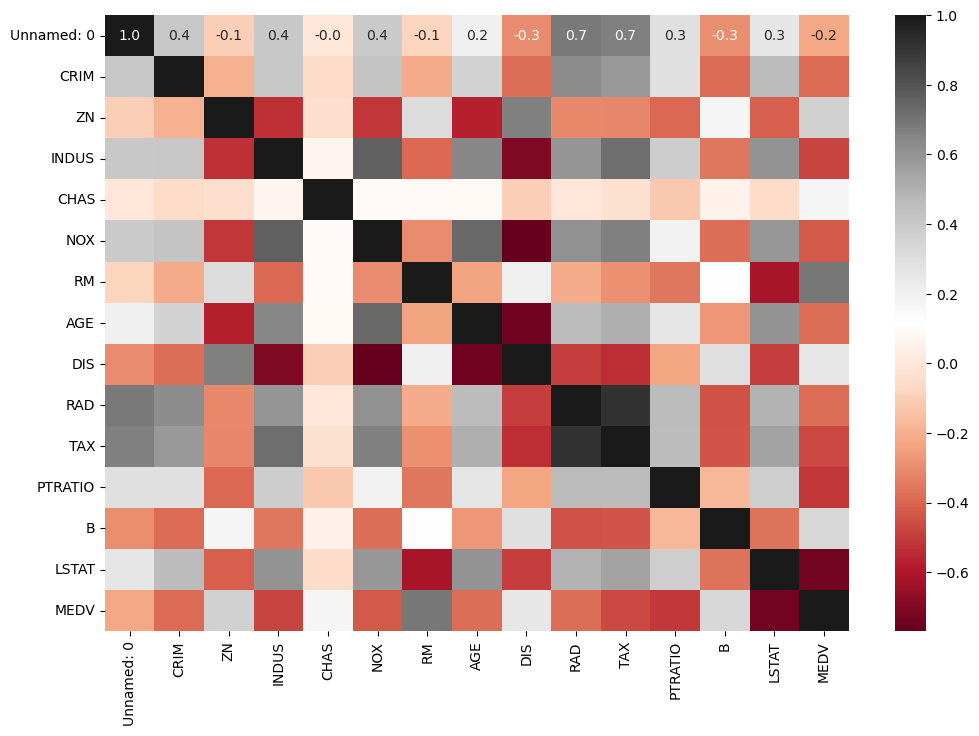

In [17]:
df.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(),cmap = 'RdGy', annot = True, fmt = '.1f')

In [18]:
df.isna().sum()


Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
MEDV          0
dtype: int64

# **Feature Engineering:**

Seperating dependent (y) and independent (x) variables

In [21]:
X = df.drop('MEDV', axis = 1)
Y = df.MEDV
print(X.shape,Y.shape)

(506, 14) (506,)


# **Model Building/ training and testing:**

Splitting training and testing dataset

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size =0.20, random_state=1)
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)
print("X_test", X_test.shape)
print('Y_test', Y_test.shape)


X_train (404, 14)
Y_train (404,)
X_test (102, 14)
Y_test (102,)


In [23]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

Creating and training model

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming X_train, Y_train, learning_rate, epochs, batch are defined
# Also, X.shape[1] should give the input shape correctly

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.MeanSquaredError()]
)
model.fit(X_train, Y_train, epochs=epochs, batch_size=batch, verbose=True)



Epoch 1/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - loss: 352.4852 - mean_squared_error: 352.4852   
Epoch 2/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 66.2323 - mean_squared_error: 66.2323
Epoch 3/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 70.1117 - mean_squared_error: 70.1117
Epoch 4/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - loss: 71.9966 - mean_squared_error: 71.9966
Epoch 5/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 56.0444 - mean_squared_error: 56.0444
Epoch 6/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 56.2805 - mean_squared_error: 56.2805
Epoch 7/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 57.0572 - mean_squared_error: 57.0572
Epoch 8/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 54.8351 - mean_squared_error: 54.8351
Epoch 9/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 45.9484 - mean_squared_error: 45.9484
Epoch 10/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 56.3733 - mean_squared_error: 56.3733 
Epo

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 34.9718 - mean_squared_error: 34.9718
Epoch 63/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 30.3338 - mean_squared_error: 30.3338
Epoch 64/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 31.5586 - mean_squared_error: 31.5586
Epoch 65/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 30.8430 - mean_squared_error: 30.8430
Epoch 66/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 32.5163 - mean_squared_error: 32.5163
Epoch 67/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 32.0079 - mean_squared_error: 32.0079
Epoch 68/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 29.9669 - mean_squared_error: 29.9669
Epoch 69/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 36.9084 - mean_squared_error: 36.9084
Epoch 70/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 40.0501 - mean_squared_error: 40.0501
Epoch 71/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 31.6649 - mean_squared_error: 31.6649
Epoch 72/150

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 28.1346 - mean_squared_error: 28.1346
Epoch 124/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 25.4134 - mean_squared_error: 25.4134
Epoch 125/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 22.6981 - mean_squared_error: 22.6981
Epoch 126/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 34.6391 - mean_squared_error: 34.6391
Epoch 127/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 31.6530 - mean_squared_error: 31.6530
Epoch 128/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 26.4241 - mean_squared_error: 26.4241
Epoch 129/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - loss: 31.2905 - mean_squared_error: 31.2905
Epoch 130/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 32.4045 - mean_squared_error: 32.4045
Epoch 131/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30.7266 - mean_squared_error: 30.7266 
Epoch 132/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.5301 - mean_squared_error: 25.5301 
Epoch 

# **Evaluating model**

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


Text(0.5, 1.0, 'Test vs Prediction')

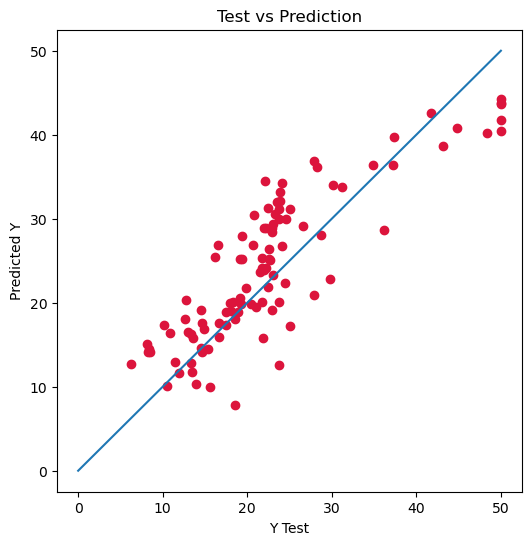

In [30]:
pred = model.predict(X_test)
plt.figure(figsize=(6, 6))
plt.scatter(Y_test, pred, c='crimson')
plt.plot(range(int(max(max(Y_test), max(pred)[0]))+1))
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Test vs Prediction')

In [31]:
from sklearn.metrics import mean_squared_error
Y_predict = model.predict(X_test)
mse = mean_squared_error(Y_predict,Y_test)
mse


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step


30.189751650920975

In [32]:
print('The MSE value is: ', model.evaluate(X_test, Y_test, verbose=False)[0])

The MSE value is:  30.18975257873535
